<h1><center>SEIS 763 Machine Learning<br>Team 4 Project - Kernal Principal Component Analysis (KPCA)<br>Wess Kilker&emsp;Tianyu Lei&emsp;Jason Xiao &emsp;Jessica Zastoupil</center></h1>

### Data Load, Feature Updates & Data Prep

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use the encoding as latin1 to read this file as there are some special characters in the file
df = pd.read_csv('SeoulBikeData.csv',encoding='latin1')

# Filter out non functioning days
df = df.loc[df['Functioning Day'] == 'Yes']

#Add Weekday Column
df['DayOfWeek'] = pd.to_datetime(df['Date']).apply(lambda x: x.weekday())

# Move rented bike count to end and remove unneeded features: Date and Functioning Day
df = df[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday','DayOfWeek', 'Rented Bike Count']]

# Split into X and y
X = df.iloc[:,0:-1].values #All except the last column
y = df.iloc[:,-1].values #Only the last column

# Deal with categorical variables: OneHot Encoding
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
col_trans = make_column_transformer((OneHotEncoder(), [9,10]), remainder='passthrough')
X = col_trans.fit_transform(X)

# Drop excess column for each encoded feature
X=X[:,[1,2,3,5,6,7,8,9,10,11,12,13,14,15]]

# Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### KPCA Transformation

In [ ]:
#Kernel PCA

#Applying Kernel PCA
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
for i in range(14, 0, -1):
    
    kernelPCAObj= KernelPCA(n_components=i, kernel='rbf')

    X_train_kernel= kernelPCAObj.fit_transform(X_train)
    X_test_kernel= kernelPCAObj.transform(X_test)

    #Fitting Logistic Regression to Training Set
    
    classifierObj = LogisticRegression(max_iter=10000, random_state=0)
    classifierObj.fit(X_train_kernel, y_train)

    #Making predictions on the Test Set
    y_pred = classifierObj.predict(X_test_kernel)

    #Model Accuracy
    print('The Kernel PCA with ' + str(i) + ' components model accuracy of the training set is: ' + str(classifierObj.score(X_train_kernel,y_train)))
    print('The Kernel PCA with ' + str(i) + ' components model accuracy of the test set is: ' + str(classifierObj.score(X_test_kernel,y_test)))

The Kernel PCA with 14 components model accuracy of the training set is: 0.012151898734177215
The Kernel PCA with 14 components model accuracy of the test set is: 0.0027559055118110236
The Kernel PCA with 13 components model accuracy of the training set is: 0.010464135021097047
The Kernel PCA with 13 components model accuracy of the test set is: 0.001968503937007874
The Kernel PCA with 12 components model accuracy of the training set is: 0.009451476793248944
The Kernel PCA with 12 components model accuracy of the test set is: 0.0027559055118110236
The Kernel PCA with 11 components model accuracy of the training set is: 0.008945147679324894
The Kernel PCA with 11 components model accuracy of the test set is: 0.002362204724409449
The Kernel PCA with 10 components model accuracy of the training set is: 0.009282700421940928
The Kernel PCA with 10 components model accuracy of the test set is: 0.002362204724409449
The Kernel PCA with 9 components model accuracy of the training set is: 0.0077

In [ ]:
#Applying KPCA using number of components from best fit in code above
from sklearn.decomposition import PCA

kernelPCAObj = KernelPCA(n_components=14, kernel='rbf')
X_train_kernel= kernelPCAObj.fit_transform(X_train)
X_test_kernel= kernelPCAObj.transform(X_test)

print(X_train_kernel.shape)
print(X_test_kernel.shape)

(5925, 14)
(2540, 14)


### Models

#### Linear Regression

In [ ]:
#Fitting Linear Regression to Training Set
from sklearn.linear_model import LinearRegression
import numpy as np
lrObj = LinearRegression()
lrObj.fit(X_train_kernel, y_train)

#Prediction on the Test Set
y_pred = lrObj.predict(X_test_kernel)

#accuracy (R squared)
print('The linear model accuracy is: ' + str(lrObj.score(X_test_kernel,y_test)))

# mean squared error/Root Mean Square Error
from sklearn.metrics import mean_squared_error
mse=round((mean_squared_error(y_test, y_pred))/100, 4)
rmse = round((np.sqrt(mse))/100 ,4)

print("MSE:", mse)
print("RMSE:",rmse)

#K-Fold Cross Validation
print('Cross Validation')
from sklearn.model_selection import cross_val_score
modelAccuracies_LR = cross_val_score(estimator=lrObj, X=X_train_kernel, y=y_train, cv=10)
print('Model Accuracy Mean:',modelAccuracies_LR.mean())
print('Model Accuracy StDev:',modelAccuracies_LR.std())

The linear model accuracy is: 0.5705352930794682
MSE: 1738.3417
RMSE: 0.4169
Cross Validation
Model Accuracy Mean: 0.591094159543023
Model Accuracy StDev: 0.028528625275926454


#### Polynomial (Degrees = 2)

In [ ]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

polyFeatureObj = PolynomialFeatures(degree=2)
poly_X_train = polyFeatureObj.fit_transform(X_train)
poly_X_test = polyFeatureObj.transform(X_test)

#Fit LinerR Model
lrObjAfterPoly = linear_model.LinearRegression()
model = lrObjAfterPoly.fit(poly_X_train, y_train)

#Prediction on the Test Set
poly_y_pred = lrObjAfterPoly.predict(poly_X_test)
score_poly = model.score(poly_X_test, y_test)

#accuracy (R squared)
print('The linear model accuracy after Polynomial (degree=2) is: ' + str(score_poly))

# mean squared error/Root Mean Square Error
from sklearn.metrics import mean_squared_error
mse_poly=round((mean_squared_error(y_test, poly_y_pred))/100, 4)
rmse_poly = round((np.sqrt(mse_poly))/100 ,4)

print("MSE:", mse_poly)
print("RMSE:",rmse_poly)

#K-Fold Cross Validation
print('Cross Validation')
from sklearn.model_selection import cross_val_score
modelAccuracies_poly = cross_val_score(estimator=lrObjAfterPoly, X=poly_X_train, y=y_train, cv=10)
print('Model Accuracy Mean:',modelAccuracies_poly.mean())
print('Model Accuracy StDev:',modelAccuracies_poly.std())

The linear model accuracy after Polynomial (degree=2) is: 0.701302298679025
MSE: 1209.0369
RMSE: 0.3477
Cross Validation
Model Accuracy Mean: 0.650607530174015
Model Accuracy StDev: 0.12415528867522944


#### Tree Forest

In [ ]:
#Create and Fit a Regressor Object
from sklearn.ensemble import RandomForestRegressor
regObj = RandomForestRegressor(n_estimators=10, random_state=0)
regObj.fit(X_train_kernel,y_train)
reg_pred_y = regObj.predict(X_test_kernel)

#accuracy (R squared)
score_reg = regObj.score(X_test_kernel,y_test)
print('The linear model accuracy after Polynomial (degree=2) is: ' + str(score_reg))

# mean squared error/Root Mean Square Error
from sklearn.metrics import mean_squared_error
mse=round((mean_squared_error(y_test, reg_pred_y))/100, 4)
rmse = round((np.sqrt(mse))/100 ,4)

print("MSE:", mse)
print("RMSE:",rmse)

#K-Fold Cross Validation
print('\nCross Validation:')
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=regObj, X=X_train_kernel, y=y_train, cv=10)
print('Model Accuracy Mean:',modelAccuracies.mean())
print('Model Accuracy StDev:',modelAccuracies.std())

#Visualizing after Tree Forest Regression
import matplotlib.pyplot as plt

#compare results vs actual
fig, ax = plt.subplots()
plt.hist(y_test - reg_pred_y)
plt.annotate("MSE: " + str(round(mse,4)) + "\nRMSE: " +str(round(rmse,4)) + "\nAccuracy: " + str(round(score_reg,4)), (-1500,700))
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')
plt.show()

The linear model accuracy after Polynomial (degree=2) is: 0.7354103370738143
MSE: 1070.978
RMSE: 0.3273

Cross Validation:
Model Accuracy Mean: 0.7388104709929773
Model Accuracy StDev: 0.01644067348433073


#### KNN Regressor

The accuracy after kNN is: 0.7205692834888919
MSE: 1070.978
RMSE: 0.3273

Cross Validation with kNN set to 4:
Model Accuracy Mean: 0.7332265348235432
Model Accuracy StDev: 0.02452413171093009


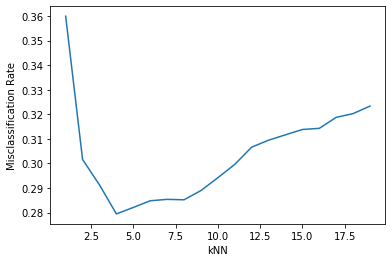

In [ ]:
#KNN - Regression
from sklearn.neighbors import KNeighborsRegressor

X_Results = np.empty((0), int)
Y_Results = np.empty((0), float)
for i in range(1,20, 1):
    KNeighborsRegressorObj = KNeighborsRegressor(n_neighbors=i, p=2, metric='minkowski')
    KNeighborsRegressorObj.fit(X_train_kernel, y_train)
    
    #Making predictions on the Test Set
    y_pred = KNeighborsRegressorObj.predict(X_test_kernel)
    X_Results = np.append(X_Results, [i], axis = 0)
    Y_Results = np.append(Y_Results, [1-KNeighborsRegressorObj.score(X_test_kernel,y_test)], axis = 0)


    
plt.xlabel('kNN')
plt.ylabel('Misclassification Rate')
plt.plot(X_Results, Y_Results)
minY = min(Y_Results)
y_index = np.where(Y_Results == minY)

#Keep the best result for use later
KNeighborsRegressorObj = KNeighborsRegressor(n_neighbors=X_Results[y_index][0], p=2, metric='minkowski')
KNeighborsRegressorObj.fit(X_train_kernel, y_train)

#Making predictions on the Test Set
y_pred = KNeighborsRegressorObj.predict(X_test_kernel)

#accuracy 
score_knn = KNeighborsRegressorObj.score(X_test_kernel,y_test)
print('The accuracy after kNN is: ' + str(score_knn))

# mean squared error/Root Mean Square Error
mse=round((mean_squared_error(y_test, reg_pred_y))/100, 4)
rmse = round((np.sqrt(mse))/100 ,4)

print("MSE:", mse)
print("RMSE:",rmse)


#K-Fold Cross Validation
print('\nCross Validation with kNN set to ' + str(X_Results[y_index][0]) + ':')
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=KNeighborsRegressorObj, X=X_train_kernel, y=y_train, cv=10)
print('Model Accuracy Mean:',modelAccuracies.mean())
print('Model Accuracy StDev:',modelAccuracies.std())